In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# to build linear regression_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Loading the dataset

In [ ]:
# write the code for reading the dataset AxisInsurance.csv
device_data = pd.read_csv(r'/content/drive/MyDrive/used_device_data.csv')
device_data = pd.DataFrame(device_data)
print(device_data)


     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.

The data contains 3454 rows and 15 columns. Each row of the dataset contains information about one phone.

My objective is to find a way to estimate the price of used phone using the values in the other columns. 

## Data Overview

- Observations
- Sanity checks

In [ ]:
device_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

The observation from the above data 

* "screen_size", "main_camera_mp", "selfie_camera_mp", "int_memory", 
"ram", "battery", "weight", "release_year", "days_used", "normalized_used_price", "normalized_new_price" are numbers 
* "brand_name", "os", "4g", "5g" are strings. "4g" and "5g" are categorical
* There are missing value in the dataset



In [ ]:
device_data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


The values in the data above looks okay because there is no negative value, this will reduce the amount of data cleaning.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
#reconfiguring the default settings
sns.set_style('darkgrid')

###Distribution of Normalized used phone price

In [ ]:
device_data['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Distribution of normalized used and new device prices

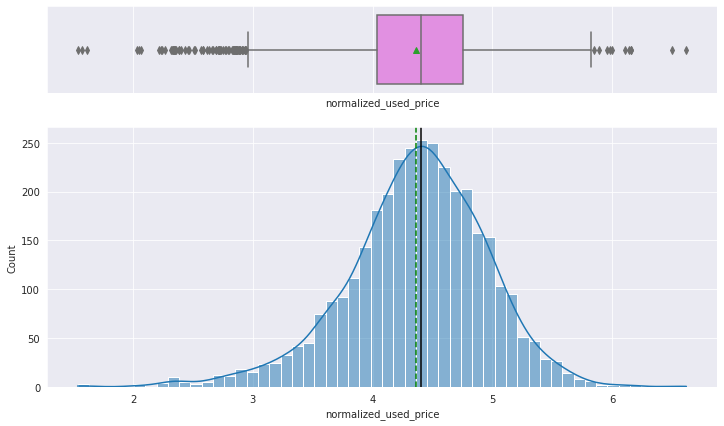

In [ ]:
histogram_boxplot(device_data, "normalized_used_price", kde=True)

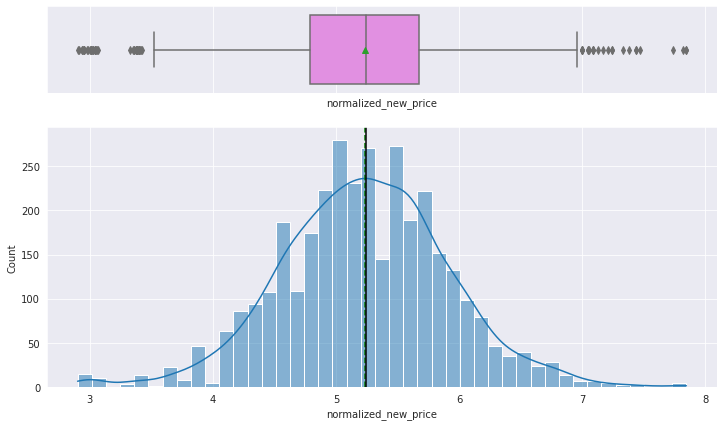

In [ ]:
histogram_boxplot(device_data, "normalized_new_price", kde=True)

* The distribution of the Normalized used price is symmetric. Most of the prices are not to far from the mean price of 4.365.

###The percentage of the used device market dominated by Android

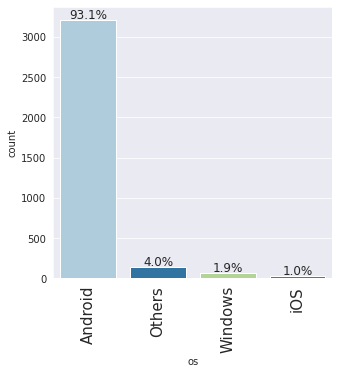

In [ ]:
labeled_barplot(device_data, "os", perc=True)

* Over 90% of the used phone market is dominated by andorid devices

### Variety of size of RAM (in GB) with different brand

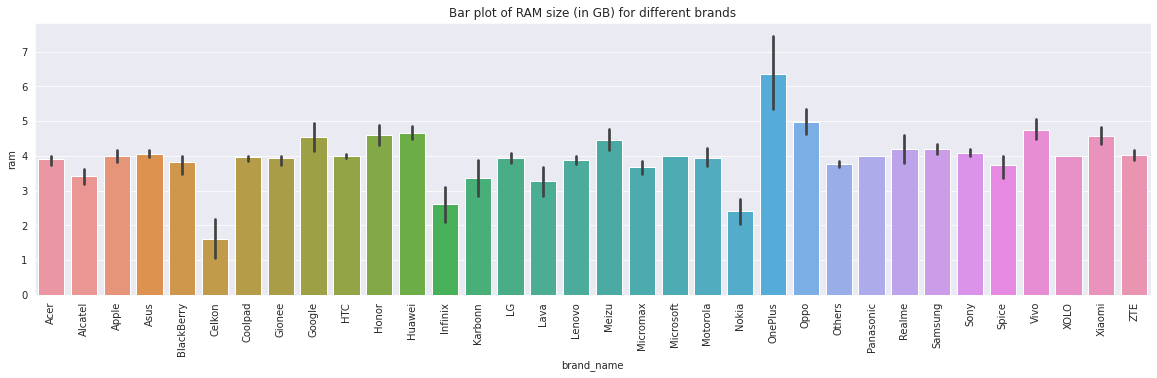

In [ ]:
plt.figure(figsize=(20,5))

sns.barplot(data = device_data.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("Bar plot of RAM size (in GB) for different brands")
plt.show()

* Many of the brands have most of the RAM of 4GB but there are still some outliers. Celkon, Infinix and Nokia have Ram far below 4GB while Oneplus and Oppo have Ram far above 4GB

###Variance of Phone weight for device with batteries larger than 4500mAh

In [ ]:
largebatteries_device = device_data[device_data["battery"]>4500]
print(largebatteries_device.shape)

(341, 15)


* there are 341 phones with battery larger than 4500mAh

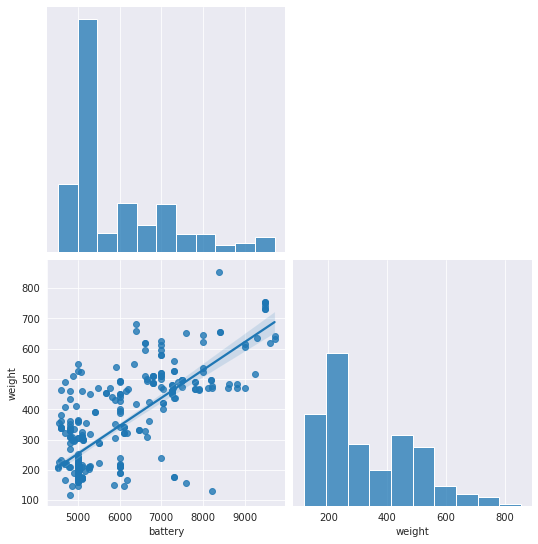

Linear correlation between phone's weight and battery is 0.8


In [ ]:
cor = sns.pairplot(data = largebatteries_device[["battery","weight"]], corner=True, kind="reg")
cor.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation between phone's weight and battery is", \
      round(largebatteries_device.corr()["weight"]["battery"] , 1))

* with the correlaton of 0.8, we can conlude that there is relationship between battery size and phone weight.

###Distribution phones with screen larger than 6 inches across brands

In [ ]:
#6 inches = 2.54cm * 6 = 15.24 cm 
largescreen_device = device_data[device_data["screen_size"]>15.24]
print(largescreen_device.shape)

(1099, 15)


* There are 1099 refurbished phones with large screen size larger 6 inches

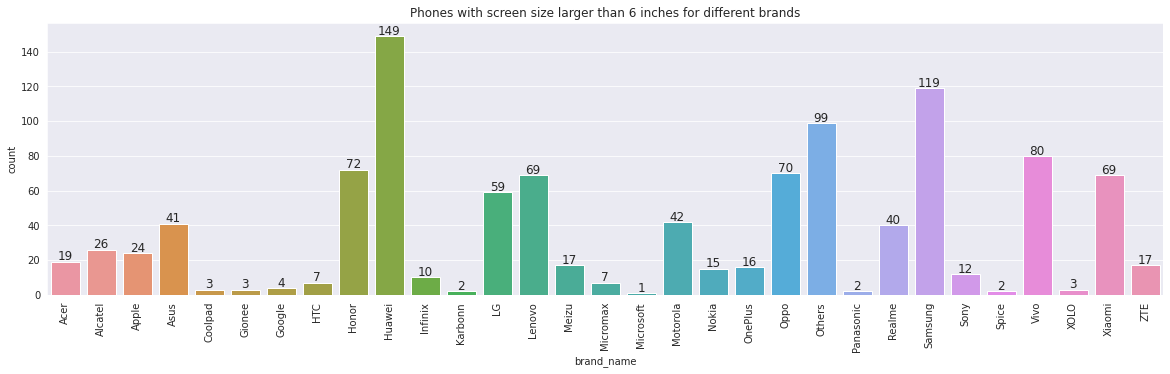

In [ ]:
plt.figure(figsize=(20,5))

screens = sns.countplot(data = largescreen_device.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Phones with screen size larger than 6 inches for different brands")
for p in screens.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    screens.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

* Huawei has the highest number of phones with big screen (149 phones), followed by Samsung (119 phones), Vivo (80 phones), Honor (72 phones), Oppo (70 phones) among known brands.
* Microsoft (1 phone), Karbonn/Panasonic/Spice (2 phones) have the lowest number of phones with big screen size

###Distribution of devices offering greater than 8MP selfie cameras across brands

In [ ]:
greatselfiecamera = device_data[device_data["selfie_camera_mp"]>8]
print(greatselfiecamera.shape)

(655, 15)


* There are 655 phones offering selfie camera greater 8MP

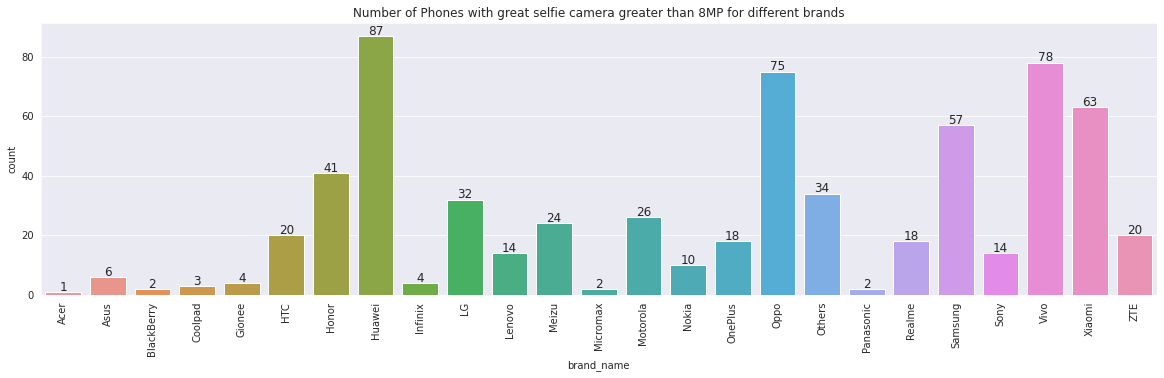

In [ ]:
plt.figure(figsize=(20,5))

selfie = sns.countplot(data = greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of Phones with great selfie camera greater than 8MP for different brands")
for p in selfie.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    selfie.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

* Huawei (87 phones), Vivo (78 phones), Oppo(75 phones), Xiaomi (63 phones) and Samsung (57 phones) have some of the highest number  phones with selfie camera greater than 8MP 
* Acer (1 phone), Blackberry/Micromax/Panasonic (2 phones) have some of the lowest number of phones with a great selfie camera greater than 8MP

### Relationships between normalized used price and every Features

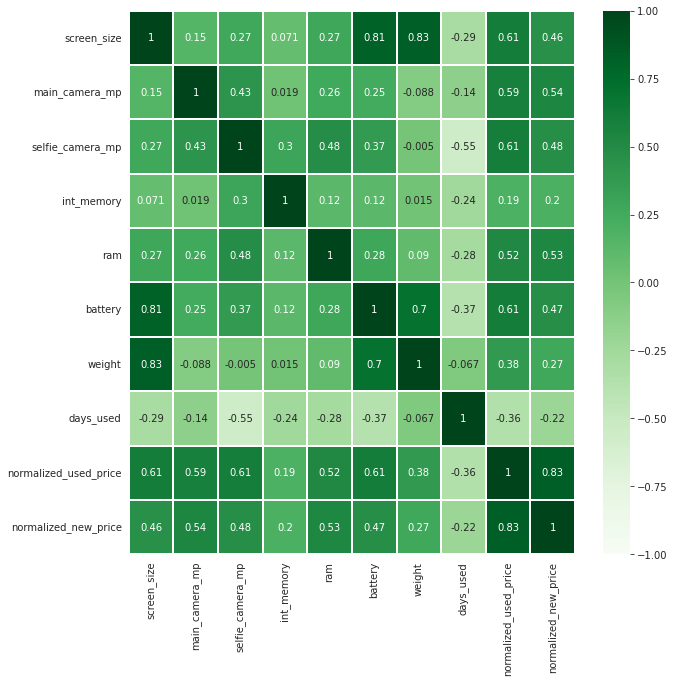

In [ ]:
numeric_columns = device_data.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") 

plt.figure(figsize=(10,10))
sns.heatmap(device_data[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Greens", linewidths=0.05);

* normalized_used_price is strongly positively correlated with normalized_used_price.
* normalized_used_price is moderately positively correlated with screen size (0.61), selfie_camera_mp (0.61), battery (0.61), main_camera_mp (0.59) and ram (0.52).
* normalized_used_price has low positive correlation with int_memory (0.19) and weight (0.38)
* Normalized_used_price has low negative correlation with days_used (-0.36)

### Checking for Missing Value

In [ ]:
device_data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight.
* The Target normalized_used_price did not have missing value

###Inputing Missing Value with the mean value using SKlearn

In [ ]:
numeric_column = device_data.select_dtypes(include = np.number).columns.to_list()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
imputer.fit(device_data[numeric_column])

SimpleImputer()

In [ ]:
#Let's look at input value
list(imputer.statistics_)

[13.713115228720325,
 9.460207633587787,
 6.554229432213209,
 54.57309855072464,
 4.036121739130435,
 3133.402697215777,
 182.75187119234116,
 2015.965257672264,
 674.8697162709901,
 4.364712079133179,
 5.2331071719030104]

In [ ]:
device_data[numeric_column] = imputer.transform(device_data[numeric_column])

Checking the Missing value Again

In [ ]:
device_data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* All the input value has been filled with the mean

### Checking for Outliers

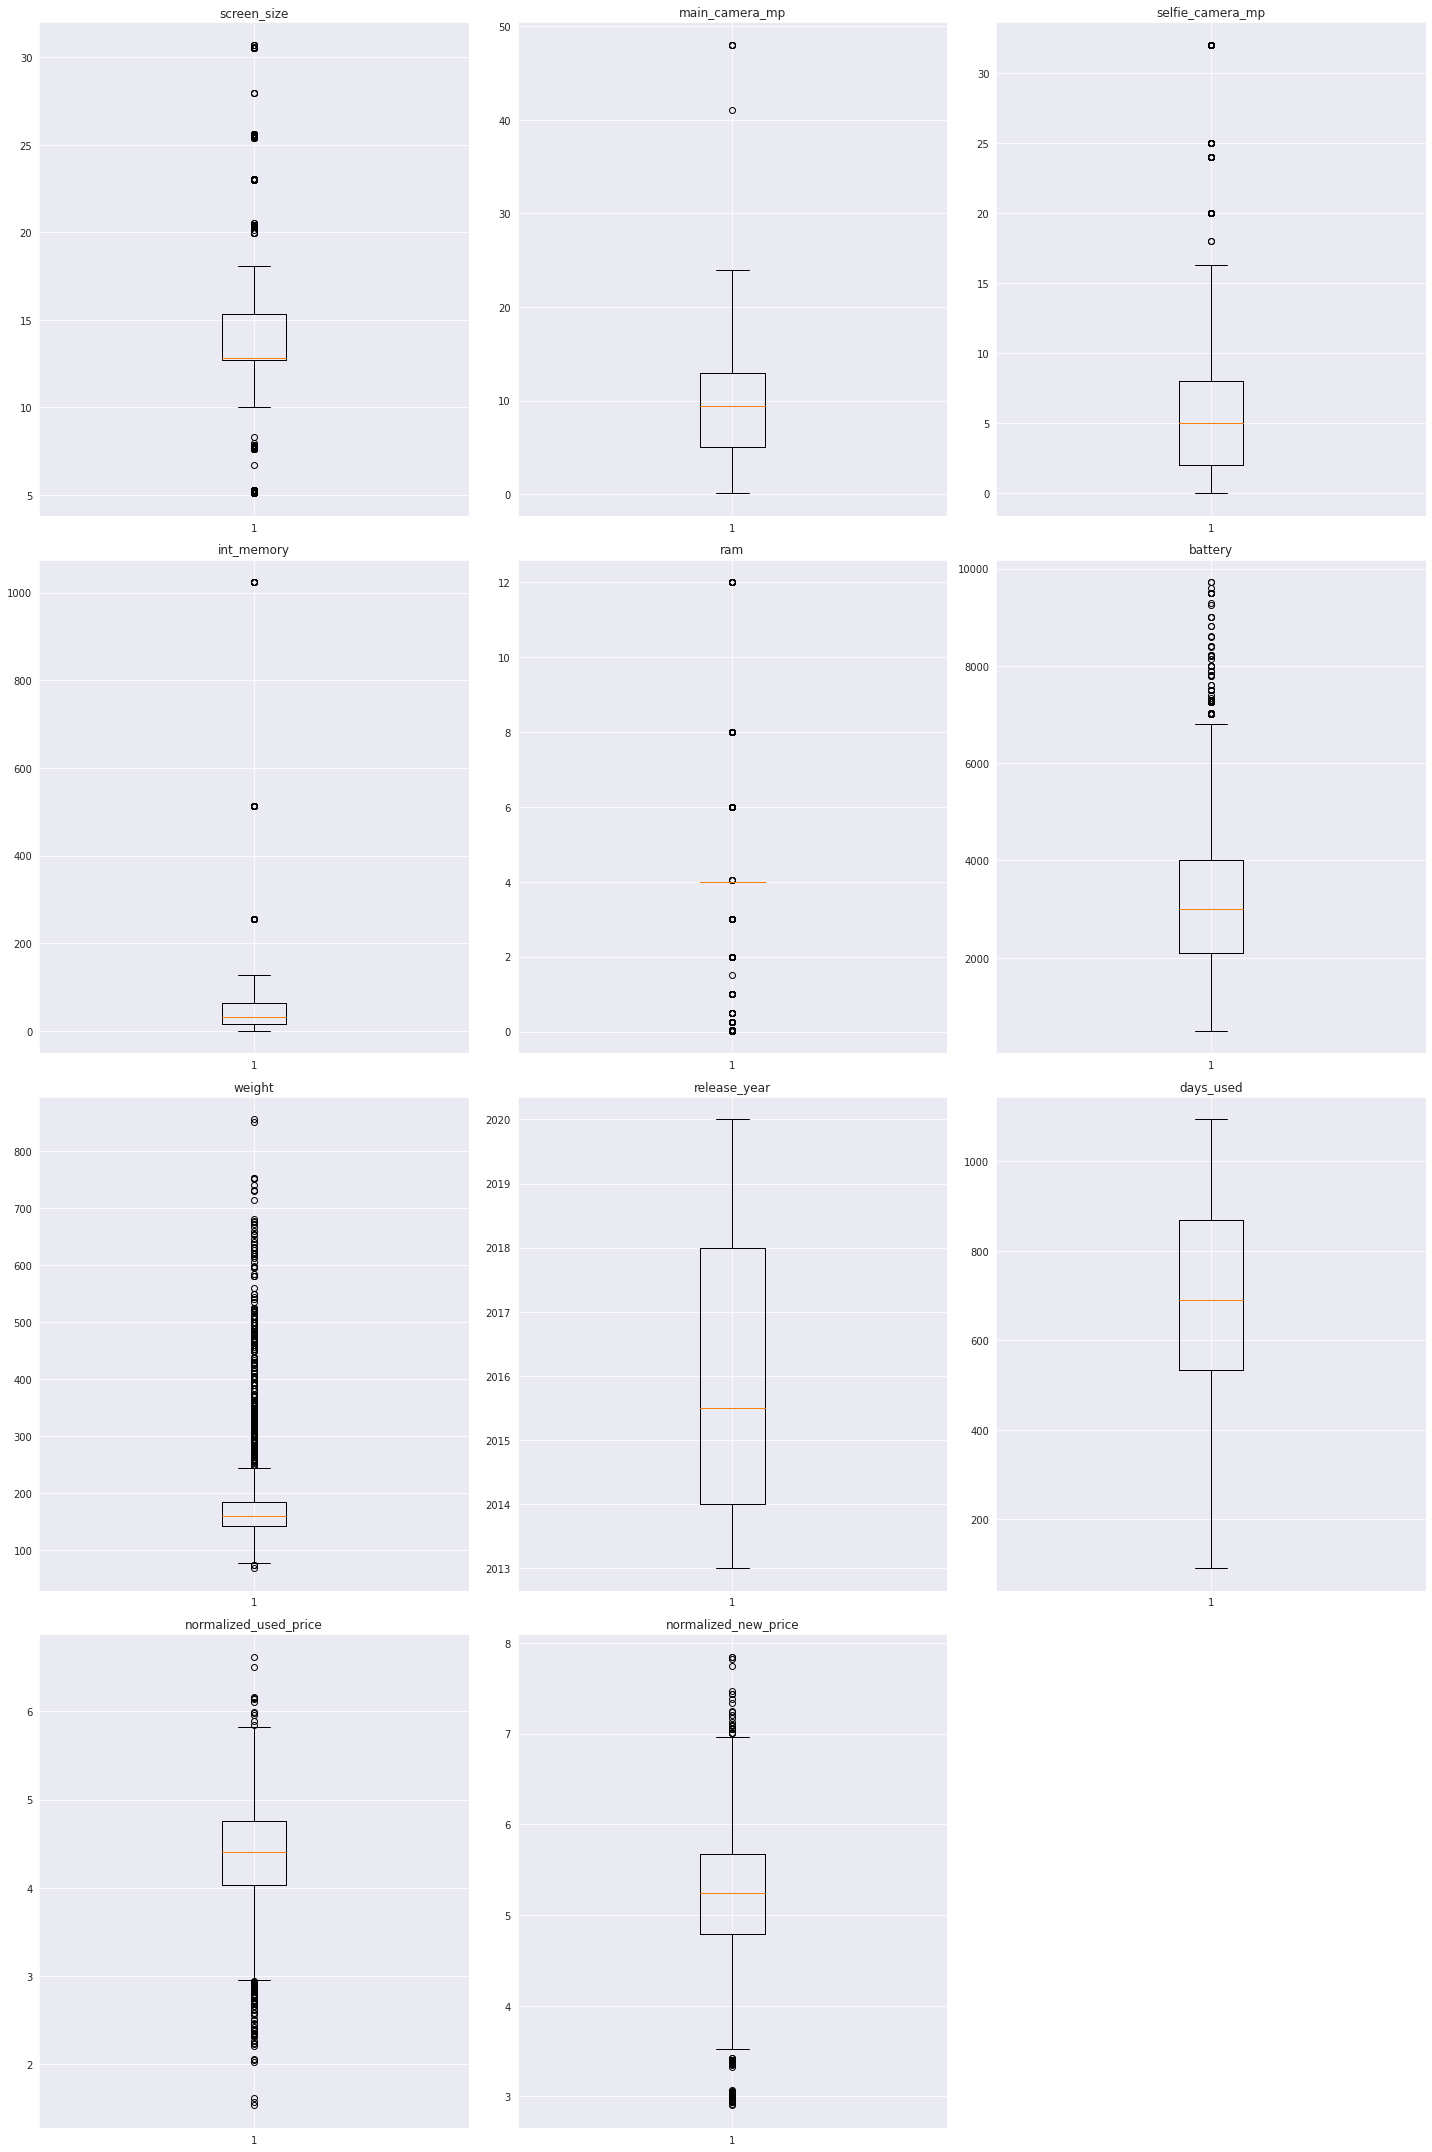

In [ ]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_column):
    plt.subplot(4,3, i + 1)
    plt.boxplot(device_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There is no outliers in the days_used and year
* There are a few upper outliers in the main_camera_mp, selfie_camera_mp, int_memory and battery. 
* There are more than a few lower and upper outliers in the screen_size and weight columns
* There some lower and upper outliers in the normalized_used_price and normalized_used_price

### Treating the Outliers using flooring and capping

In [ ]:
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [ ]:
# treating the outliers
numerical_col = device_data.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(device_data, numerical_col)

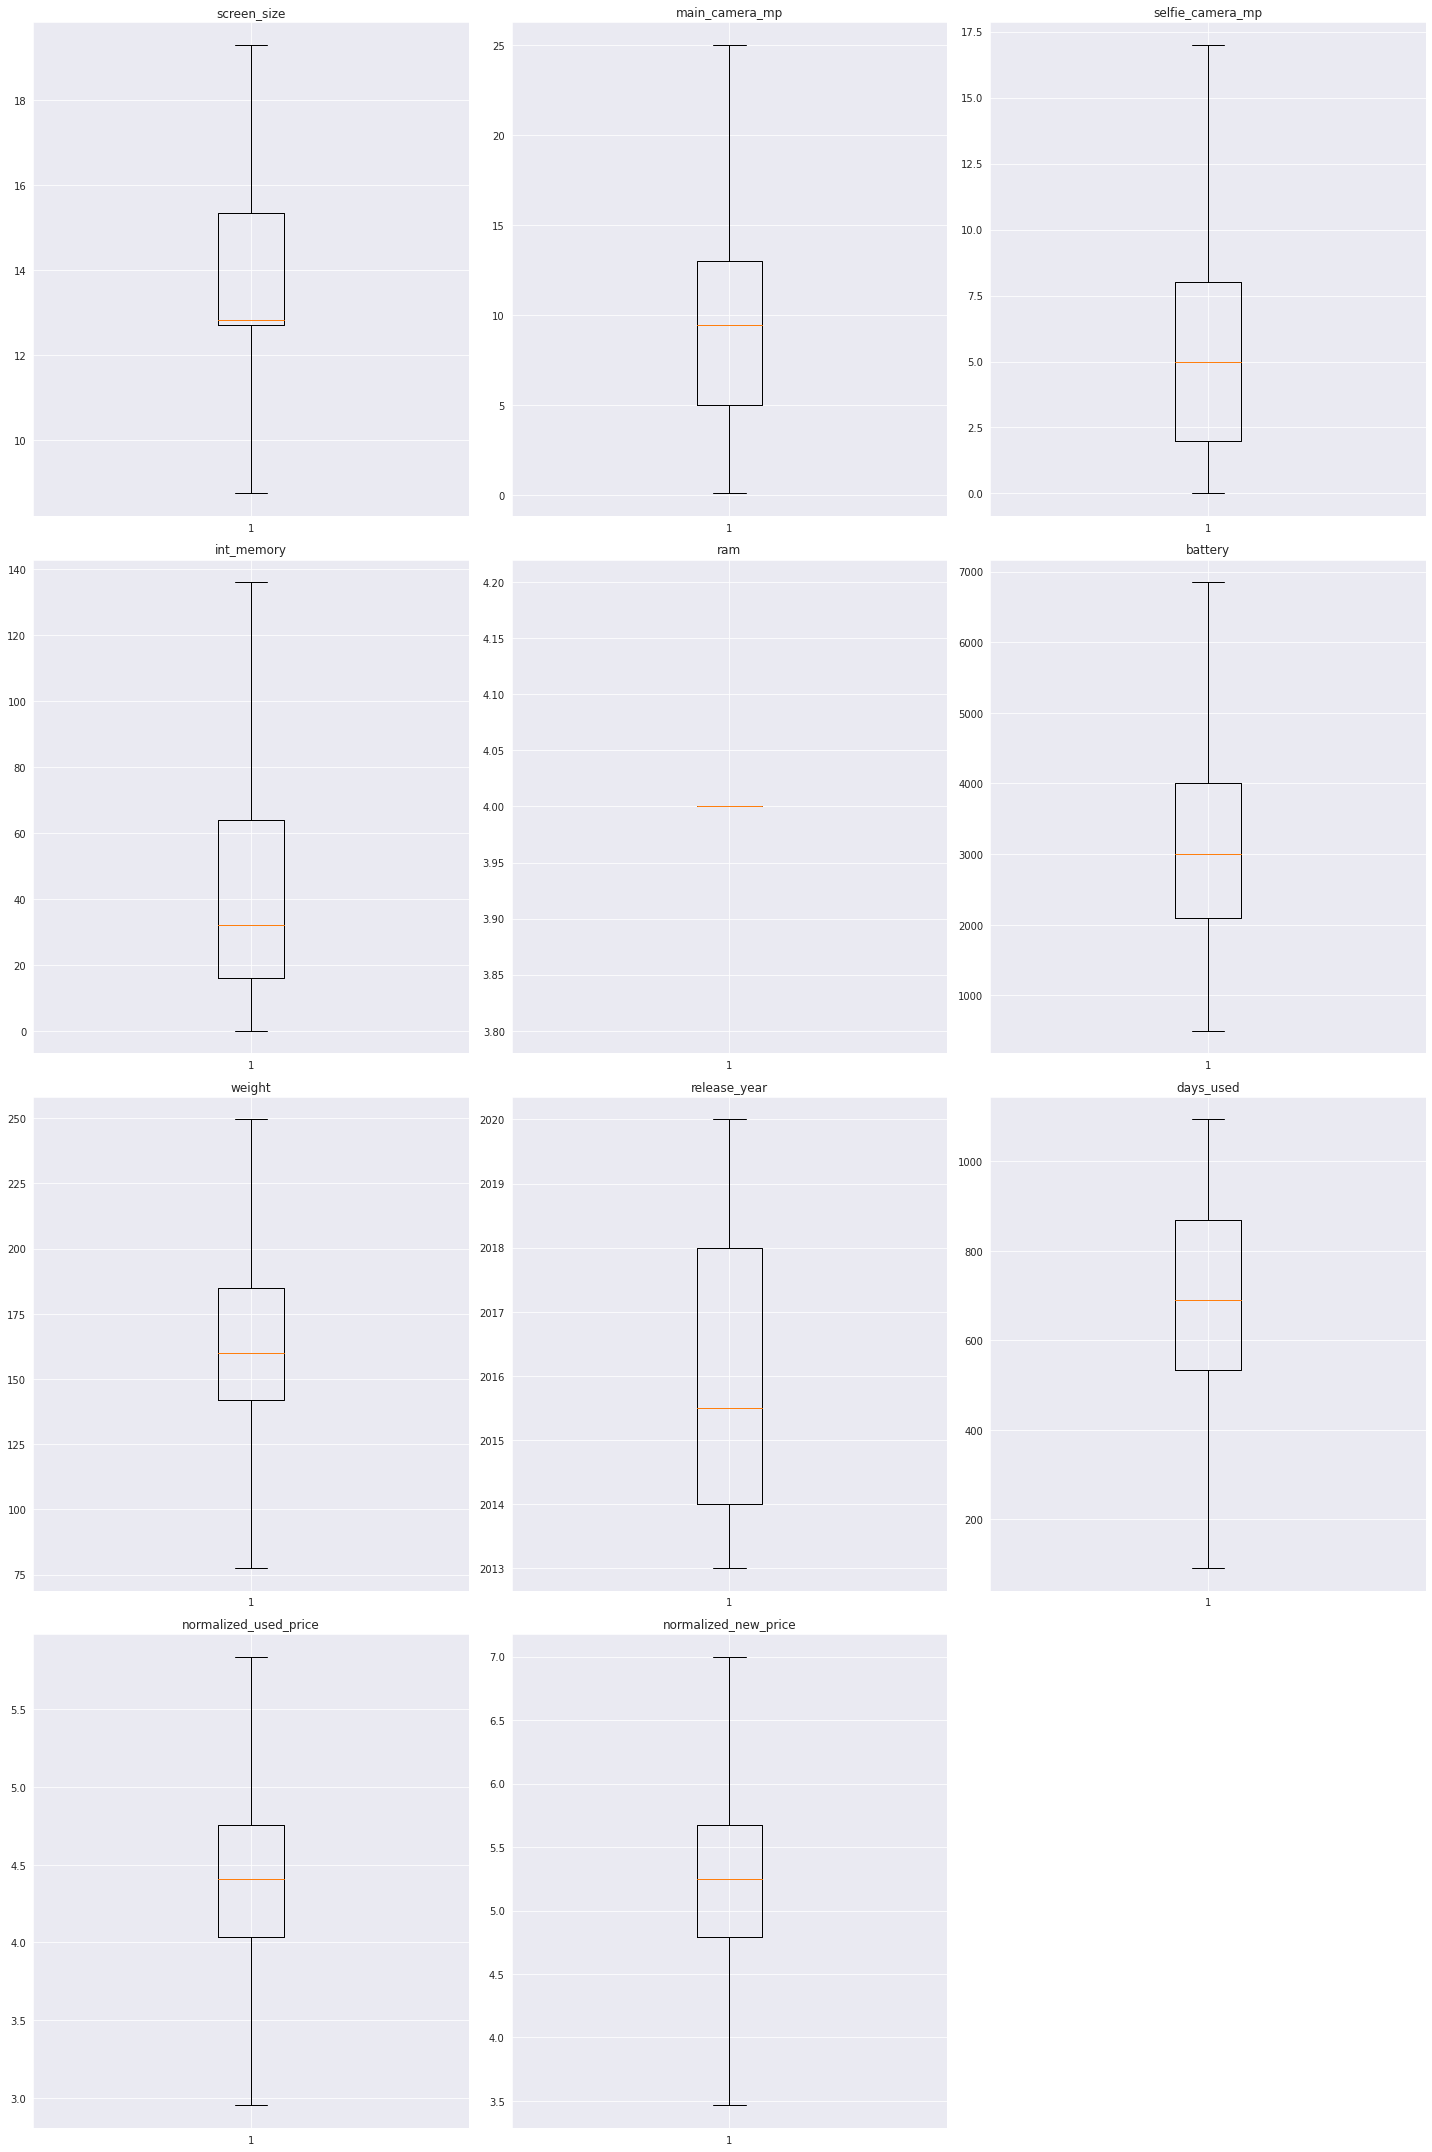

In [ ]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_column):
    plt.subplot(4,3, i + 1)
    plt.boxplot(device_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* The outliers has been remove

### Dropping some features

In [ ]:
# Dropping Ram because it has single value of 4 after removing outliers
device_data.drop("ram", axis=1, inplace=True)

### Building the Model

In [ ]:
# creating input (X) and target (y) variables
X = device_data.drop(["normalized_used_price", "release_year"], axis=1) # since year is a temporal variable
y = device_data["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0      127.0   
1              16.0       128.0   4300.0   213.0      325.0   
2               8.0       128.0   4200.0   213.0      162.0   
3               8.0        64.0   6850.0   249.5      345.0   
4               8.0        64.0   5000.0   185.0      293.0   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: norm

In [ ]:
# encoding categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3454, 46)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,brand_name_Apple,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127.0,4.715100,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325.0,5.519018,0,0,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162.0,5.884631,0,0,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,345.0,5.630961,0,0,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293.0,4.947837,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 80:20 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2763
Number of rows in test data = 691


In [ ]:
# fitting the model on the train data

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Model coefficients
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,0.041972
main_camera_mp,0.022227
selfie_camera_mp,0.018030
int_memory,0.000586
battery,0.000011
weight,0.001346
days_used,0.000003
normalized_new_price,0.383297
brand_name_Alcatel,-0.059617
brand_name_Apple,0.283225


In [ ]:
# compute R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Performance of model

In [ ]:
# checking model performance on train set
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, x_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.222558,0.175715,0.844547,0.841914,4.12289


In [ ]:
# checking model performance on test set
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225245,0.180698,0.836034,0.824322,4.222626


## Obervations
* The model is able to explain ~84% of the variation in the data, it shows the model in not underfitting

* The train and test RMSE and MAE of (0.222558	and 0.175715) and (0.225245 and	0.180698) are low and comparable. It shows the model is not overfitting

* The MAE indicates that our current model is able to predict normalized_used_price within a mean error of 0.18 on the test data
* MAPE on the test set suggests we can predict within 2.22% of normalized_used_price

Hence, we can conclude the model is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

* We can see that selfie_camera, screen_size, and int_memory are significant parameters to determine the price of used phone.

* 1 unit increase in normalized_new_price is expected to increase normalized_used_price by almost 0.383 units

* The correlation between normalized_used_price and normalized_new_price during EDA was found to be strongly postive (0.83), therby reafirming model validity

* 4g and 5g are both significant parameters, they contributed positively

* The battery, weight and days_used are not really a contributing factor to the normalized_used price. Their coefficient respectively are 0.000011, 0.001346 and 0.00003 

* The linear predictive model is able to predict the normalized_used_price of the phone, explaining ~84% of the variance in the data, within a mean absolute percentage error of ~4.2%. The model is hence good

All of the assumptions for linear regression were met for the model
